In [2]:
#%%javascript
#IPyton.load_extensions('calico-spell-check');

## Project 2: Wrangling NYC Subway Turnstile and Weather Data
###Zach Farmer 
***  

##Table of Contents     
[Goals](#Goals)          
[Problem set 2 -- Wrangling Turnstile Data](#Problem set 2 -- Wrangling Turnstile Data)     
[Problem Set 3 -- Analyzing Subway Data](#Problem Set 3: Analyzing Subway Data)     
[Problem Set 4 - Visualizing Subway Data](#Problem Set 4 - Visualizing Subway Data)      
[Problem Set 5 -- MapReduce](#Problem Set 5 -- MapReduce)      

<a id="Goals"></a>   
***

##Goals
* Get a sense of the data using SQL queries
* Clean and process the data

More information concerning pandas sql method can be found [here](https://dev.mysql.com/doc/refman/5.1/en/counting-rows.html "https://dev.mysql.com/doc/refman/5.1/en/counting-rows.html")

The weather data used in the project 2 code below can be found [here](https://www.dropbox.com/s/7sf0yqc9ykpq3w8/weather_underground.csv "https://www.dropbox.com/s/7sf0yqc9ykpq3w8/weather_underground.csv")   

**Note:**
> Any csv files referenced in the following project can be found in the local directory.

The following code contains my responses to all of the problem sets contained in Udacity's [Intro to Data Science Course](https://www.udacity.com/course/intro-to-data-science--ud359 "https://www.udacity.com/course/intro-to-data-science--ud359"). These problem sets are related to the NYC Subway data and are basis from which I addressed the the questions contained within the Short Q&A ipython notebook to be found in the local directory.        

<a id="Probem set 2 -- Wrangling Subway Data"></a>
***

##Problem Set 2 -- Wrangling Subway Data   

In [1]:
# Important modules for Problem Set 2
import csv
import pandas as pd
import pandasql
import datetime

####Determine the number of days that it rained in the weather data set  

> You can read more about SQL's count function [here](https://dev.mysql.com/doc/refman/5.1/en/counting-rows.html "https://dev.mysql.com/doc/refman/5.1/en/counting-rows.html")

In [2]:
def num_rainy_days(filename):
    '''
    This function should run a SQL query on a dataframe of
    weather data.  The SQL query should return one column and
    one row - a count of the number of days in the dataframe where
    the rain column is equal to 1 (i.e., the number of days it
    rained).  The dataframe will be titled 'weather_data'. You'll
    need to provide the SQL query.  
    
    You might also find that interpreting numbers as integers or floats may not
    work initially.  In order to get around this issue, it may be useful to cast
    these numbers as integers.  This can be done by writing cast(column as integer).
    So for example, if we wanted to cast the maxtempi column as an integer, we would actually
    write something like where cast(maxtempi as integer) = 76, as opposed to simply 
    where maxtempi = 76.
    
    '''
    weather_data = pd.read_csv(filename)

    ## SQL Query
    q = """
        SELECT count(*)
        FROM weather_data 
            WHERE cast(rain as integer) = 1;
        """
    
    #Execute SQL command against the pandas frame
    rainy_days = pandasql.sqldf(q.lower(), locals())

    return rainy_days

if __name__ == "__main__":
    rainy_days = num_rainy_days("weatherUnderground.csv")
    print "Number of rainy days in the data set = {0}".format(int(rainy_days.values))

Number of rainy days in the data set = 10


####Determine the number of foggy days in the dataframe, and the maximum temperature for foggy days

In [3]:
def max_temp_aggregate_by_fog(filename):
    '''
    This function should run a SQL query on a dataframe of
    weather data.  The SQL query should return two columns and
    two rows - whether it was foggy or not (0 or 1) and the max
    maxtempi for that fog value (i.e., the maximum max temperature
    for both foggy and non-foggy days).  The dataframe will be 
    titled 'weather_data'. You'll need to provide the SQL query.
    
    You might also find that interpreting numbers as integers or floats may not
    work initially.  In order to get around this issue, it may be useful to cast
    these numbers as integers.  This can be done by writing cast(column as integer).
    So for example, if we wanted to cast the maxtempi column as an integer, we would actually
    write something like where cast(maxtempi as integer) = 76, as opposed to simply 
    where maxtempi = 76.
    
    '''
    weather_data = pd.read_csv(filename)

    q = """
    SELECT fog, max(cast (maxtempi as integer))
    FROM weather_data 
        WHERE cast(fog as integer) = 1
    
    UNION
    
    SELECT fog, max(cast (maxtempi as integer))
    FROM weather_data 
        WHERE cast(fog as integer) = 0;
    
    """
    
    #Execute SQL command against the pandas frame
    foggy_days = pandasql.sqldf(q.lower(), locals())
    
    return foggy_days

if __name__ == "__main__":
    results = max_temp_aggregate_by_fog("weatherUnderground.csv")
    print "Max temperature on days without fog = {0} degrees Farenheit\n\
Max temperature on days with fog = {1} degrees Farenheit".format \
    (results.values[0,1],results.values[1,1])

Max temperature on days without fog = 86.0 degrees Farenheit
Max temperature on days with fog = 81.0 degrees Farenheit


####Determine the mean temperature (in Fahrenheit) for weekends i.e. Saturday/Sunday from the data frame

In [9]:
def avg_weekend_temperature(filename):
    '''
    This function should run a SQL query on a dataframe of
    weather data.  The SQL query should return one column and
    one row - the average meantempi on days that are a Saturday
    or Sunday (i.e., the the average mean temperature on weekends).
    The dataframe will be titled 'weather_data' and you can access
    the date in the dataframe via the 'date' column.
    
    You'll need to provide  the SQL query.
    
    You might also find that interpreting numbers as integers or floats may not
    work initially.  In order to get around this issue, it may be useful to cast
    these numbers as integers.  This can be done by writing cast(column as integer).
    So for example, if we wanted to cast the maxtempi column as an integer, we would actually
    write something like where cast(maxtempi as integer) = 76, as opposed to simply 
    where maxtempi = 76.
    
    Also, you can convert dates to days of the week via the 'strftime' keyword in SQL.
    For example, cast (strftime('%w', date) as integer) will return 0 if the date
    is a Sunday or 6 if the date is a Saturday.
    
    '''
    weather_data = pd.read_csv(filename)

    q = """
    SELECT avg(cast (meantempi as integer))
    FROM weather_data 
        WHERE cast(strftime('%w', date) as integer) IN  (0,6);
    
    """
    
    #Execute SQL command against the pandas frame
    mean_temp_weekends = pandasql.sqldf(q.lower(), locals())
    
    return mean_temp_weekends

if __name__ == "__main__":
    results = avg_weekend_temperature("weatherUnderground.csv")
    print "The average temperature in fahrenheit for weekends is: {0} degrees fahrenheit".\
    format(int(results.values))

The average temperature in fahrenheit for weekends is: 65 degrees fahrenheit


####Determine the average minimum temperature for rainy days where the minimum temperature is greater then 55$^oF$

In [12]:
def avg_min_temperature(filename):
    '''
    This function should run a SQL query on a dataframe of
    weather data. More specifically you want to find the average
    minimum temperature on rainy days where the minimum temperature
    is greater than 55 degrees.
    
    You might also find that interpreting numbers as integers or floats may not
    work initially.  In order to get around this issue, it may be useful to cast
    these numbers as integers.  This can be done by writing cast(column as integer).
    So for example, if we wanted to cast the maxtempi column as an integer, we would actually
    write something like where cast(maxtempi as integer) = 76, as opposed to simply 
    where maxtempi = 76.
    
    '''
    weather_data = pd.read_csv(filename)

    q = """
    SELECT avg(cast (mintempi as integer))
    FROM weather_data
        WHERE cast(rain as integer) = 1 and cast(mintempi as integer) > 55;
    """
    
    #Execute SQL command against the pandas frame
    mean_temp_weekends = pandasql.sqldf(q.lower(), locals())

    return mean_temp_weekends

if __name__ == "__main__":
    results = avg_min_temperature("weatherUnderground.csv")
    print "The average minimum temperature for rainy days where the minimum temperature\
 is greater then 55 degrees fahrenheit: {0} degrees".format(int(results.values))

The average minimum temperature for rainy days where the minimum temperature is greater then 55 degrees fahrenheit: 61 degrees


####Wrangle the turnstile data 

For this exercise recommend that you use the Python csv reader/writer module, rather than pandas. Check out the Python documentation examples with csv reader, writer (only the first three examples are applicable to our problem):

[http://docs.python.org/2/library/csv.html#examples](http://docs.python.org/2/library/csv.html#examples)

Note that one single row in the input file will generate multiple different rows in the output file. For example, this one line from an input file:

`
A002,R051,02-00-00,05-21-11,00:00:00,REGULAR,003169391,001097585,05-21-11,04:00:00,REGULAR,003169415,001097588,05-21-11,08:00:00,REGULAR,003169431,001097607,05-21-11,12:00:00,REGULAR,003169506,001097686,05-21-11,16:00:00,REGULAR,003169693,001097734,05-21-11,20:00:00,REGULAR,003169998,001097769,05-22-11,00:00:00,REGULAR,003170119,001097792,05-22-11,04:00:00,REGULAR,003170146,001097801
`    

will produce the following lines in the output file:

`
A002,R051,02-00-00,05-21-11,00:00:00,REGULAR,003169391,001097585
A002,R051,02-00-00,05-21-11,04:00:00,REGULAR,003169415,001097588
A002,R051,02-00-00,05-21-11,08:00:00,REGULAR,003169431,001097607
A002,R051,02-00-00,05-21-11,12:00:00,REGULAR,003169506,001097686
A002,R051,02-00-00,05-21-11,16:00:00,REGULAR,003169693,001097734
A002,R051,02-00-00,05-21-11,20:00:00,REGULAR,003169998,001097769
A002,R051,02-00-00,05-22-11,00:00:00,REGULAR,003170119,001097792
A002,R051,02-00-00,05-22-11,04:00:00,REGULAR,003170146,001097801           `     

In otherwords, one line in the input contains multiple records, and we want to separate them into different lines. The first three elements in the input line (A002,R051,02-00-00) are repeated for each of the 8 lines in the output file.

The link to the data used below can be found [here](http://web.mta.info/developers/data/nyct/turnstile/turnstile_110507.txt "http://web.mta.info/developers/data/nyct/turnstile/turnstile_110507.txt")

Here is a CSV reader/writer introductory tutorial:   
[http://goo.gl/HBbvyy](http://goo.gl/HBbvyy)

In [13]:
def fix_turnstile_data(filenames):
    '''
    Filenames is a list of MTA Subway turnstile text files. A link to an example
    MTA Subway turnstile text file can be seen at the URL below:
    http://web.mta.info/developers/data/nyct/turnstile/turnstile_110507.txt
    
    As you can see, there are numerous data points included in each row of the
    a MTA Subway turnstile text file. 

    You want to write a function that will update each row in the text
    file so there is only one entry per row. A few examples below:
    A002,R051,02-00-00,05-28-11,00:00:00,REGULAR,003178521,001100739
    A002,R051,02-00-00,05-28-11,04:00:00,REGULAR,003178541,001100746
    A002,R051,02-00-00,05-28-11,08:00:00,REGULAR,003178559,001100775
    
    Write the updates to a different text file in the format of "updated_" + filename.
    For example:
        1) if you read in a text file called "turnstile_110521.txt"
        2) you should write the updated data to "updated_turnstile_110521.txt"

    The order of the fields should be preserved. 
   
    You can see a sample of the turnstile text file that's passed into this function
    and the the corresponding updated file in the links below:
    
    Sample input file:
    https://www.dropbox.com/s/mpin5zv4hgrx244/turnstile_110528.txt
    
    Sample updated file:
    https://www.dropbox.com/s/074xbgio4c39b7h/solution_turnstile_110528.txt
    '''
    
    #for name in filenames:
    writer = csv.writer(open('updated_'+ filenames, 'wb')) 
    data = csv.reader(open(filenames, 'rb'), delimiter = ",")
    
    for line in data:
        # seperate the 'header' data that remains the same for large subsets of
        # entries and attach later
        header_line = [index for index in line[0:3]]
            #print header_line
        for item in header_line:
            line.remove(item)
            #print line
            ## Using list comprehension and range step parameter look at remaining
            ## line elements at 5 element chunks and write those until EOL indicated
        writer.writerows(header_line + line[x:x+5] for x in range(0,len(line),5))
        '''       
            ## first messy attempt
            #updt_line = [line[0]]
            #for index in line:
                    #print index
                    #print line.index(index)
                    
                #if line.index(index) % 5 != 0:
                    #updt_line.append(index)
                #elif line.index(index) == 0:
                    #break
                #else:
                    #writer.writerow(header_line + updt_line)
                    #updt_line = []
                    #updt_line.append(index)          
                #writer.writerow(header_line + updt_line)
        '''
if __name__ == "__main__":
    fix_turnstile_data("turnstile_data.txt")
    !head -5 "updated_turnstile_data.txt"

####Create one large csv file containing all the necessary columns and rows

In [14]:
def create_master_turnstile_file(filenames, output_file):
    '''
    Write a function that takes the files in the list filenames, which all have the 
    columns 'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn', and consolidates
    them into one file located at output_file.  There should be ONE row with the column
    headers, located at the top of the file.
    
    For example, if file_1 has:
    'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'
    line 1 ...
    line 2 ...
    
    and another file, file_2 has:
    'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'
    line 3 ...
    line 4 ...
    line 5 ...
    
    We need to combine file_1 and file_2 into a master_file like below:
     'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'
    line 1 ...
    line 2 ...
    line 3 ...
    line 4 ...
    line 5 ...
    '''
    with open(output_file, 'w') as master_file:
        master_file.write('C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn\n')
        reader = open(filenames,'rb')
        for line in reader:
            master_file.write(line)

if __name__ == "__main__":
    create_master_turnstile_file("updated_turnstile_data.txt","master_turnstile.csv")
    # check that outcome is satisfactory
    !head -5 "master_turnstile.csv"

C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn






####Convert csv file of turnstile data into a pandas dataframe accepting only those entries where 'DESCn' is 'REGULAR'  

In [16]:
def filter_by_regular(filename):
    '''
    This function should read the csv file located at filename into a pandas dataframe,
    and filter the dataframe to only rows where the 'DESCn' column has the value 'REGULAR'.
    
    For example, if the pandas dataframe is as follows:
    ,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    1,A002,R051,02-00-00,05-01-11,04:00:00,DOOR,3144335,1088159
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    3,A002,R051,02-00-00,05-01-11,12:00:00,DOOR,3144424,1088231
    
    The dataframe will look like below after filtering to only rows where DESCn column
    has the value 'REGULAR':
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    '''
    data = pd.read_csv(filename)
    turnstile_data = pd.DataFrame(data)
    turnstile_data = turnstile_data[turnstile_data['DESCn'] == 'REGULAR']

    return turnstile_data

if __name__ == "__main__":
    turnstile_data = filter_by_regular("master_turnstile.csv")
    print turnstile_data.head(5)

    C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn   EXITSn
0  A002  R051  02-00-00  04-30-11  00:00:00  REGULAR   3143506  1087907
1  A002  R051  02-00-00  04-30-11  04:00:00  REGULAR   3143547  1087915
2  A002  R051  02-00-00  04-30-11  08:00:00  REGULAR   3143563  1087935
3  A002  R051  02-00-00  04-30-11  12:00:00  REGULAR   3143646  1088024
4  A002  R051  02-00-00  04-30-11  16:00:00  REGULAR   3143865  1088083


####Determine the number of 'ENTRIESn' that occur hourly or more accurately ever 4 hours, this will determine rate of entries for each station every four hours. 

In [18]:
def get_hourly_entries(df):
    '''
    The data in the MTA Subway Turnstile data reports on the cumulative
    number of entries and exits per row.  Assume that you have a dataframe
    called df that contains only the rows for a particular turnstile machine
    (i.e., unique SCP, C/A, and UNIT).  This function should change
    these cumulative entry numbers to a count of entries since the last reading
    (i.e., entries since the last row in the dataframe).
    
    More specifically, you want to do two things:
       1) Create a new column called ENTRIESn_hourly
       2) Assign to the column the difference between ENTRIESn of the current row 
          and the previous row. If there is any NaN, fill/replace it with 1.
    
    You may find the pandas functions shift() and fillna() to be helpful in this exercise.
    
    Examples of what your dataframe should look like at the end of this exercise:
    
           C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly
    0     A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                1
    1     A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23
    2     A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18
    3     A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71
    4     A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170
    5     A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214
    6     A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87
    7     A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10
    8     A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36
    9     A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153
    10    A002  R051  02-00-00  05-02-11  16:00:00  REGULAR   3145337   1088823              243
    ...
    ...

    '''
    df['ENTRIESn_hourly'] = df.groupby(['C/A','UNIT','SCP'])['ENTRIESn'].\
                            apply(lambda x: (x - x.shift(1)).fillna(1))

    return df

if __name__ == "__main__":
    turnstile_updated = get_hourly_entries(turnstile_data)    #.iloc[0:1000,:])
    print turnstile_updated.head(10)

    C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn   EXITSn  \
0  A002  R051  02-00-00  04-30-11  00:00:00  REGULAR   3143506  1087907   
1  A002  R051  02-00-00  04-30-11  04:00:00  REGULAR   3143547  1087915   
2  A002  R051  02-00-00  04-30-11  08:00:00  REGULAR   3143563  1087935   
3  A002  R051  02-00-00  04-30-11  12:00:00  REGULAR   3143646  1088024   
4  A002  R051  02-00-00  04-30-11  16:00:00  REGULAR   3143865  1088083   
5  A002  R051  02-00-00  04-30-11  20:00:00  REGULAR   3144181  1088132   
6  A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312  1088151   
7  A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335  1088159   
8  A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353  1088177   
9  A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424  1088231   

   ENTRIESn_hourly  
0                1  
1               41  
2               16  
3               83  
4              219  
5              316  
6              131  
7     

####Perform the same analysis as above but for EXITS

In [19]:
def get_hourly_exits(df):
    '''
    The data in the MTA Subway Turnstile data reports on the cumulative
    number of entries and exits per row.  Assume that you have a dataframe
    called df that contains only the rows for a particular turnstile machine
    (i.e., unique SCP, C/A, and UNIT).  This function should change
    these cumulative exit numbers to a count of exits since the last reading
    (i.e., exits since the last row in the dataframe).
    
    More specifically, you want to do two things:
       1) Create a new column called EXITSn_hourly
       2) Assign to the column the difference between EXITSn of the current row 
          and the previous row. If there is any NaN, fill/replace it with 0.
    
    You may find the pandas functions shift() and fillna() to be helpful in this exercise.
    
    Example dataframe below:

          Unnamed: 0   C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly  EXITSn_hourly
    0              0  A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                0              0
    1              1  A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23              8
    2              2  A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18             18
    3              3  A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71             54
    4              4  A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170             44
    5              5  A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214             42
    6              6  A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87             11
    7              7  A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10              3
    8              8  A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36             89
    9              9  A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153            333
    '''
    
    df['EXITSn_hourly'] = df.groupby(['C/A','UNIT','SCP'])['EXITSn'].\
                                    apply(lambda x: (x - x.shift(1)).fillna(0))
    
    return df

if __name__ == "__main__":
    turnstile_final = get_hourly_exits(turnstile_updated)    #.iloc[0:1000,:])
    print turnstile_final.head(10)

    C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn   EXITSn  \
0  A002  R051  02-00-00  04-30-11  00:00:00  REGULAR   3143506  1087907   
1  A002  R051  02-00-00  04-30-11  04:00:00  REGULAR   3143547  1087915   
2  A002  R051  02-00-00  04-30-11  08:00:00  REGULAR   3143563  1087935   
3  A002  R051  02-00-00  04-30-11  12:00:00  REGULAR   3143646  1088024   
4  A002  R051  02-00-00  04-30-11  16:00:00  REGULAR   3143865  1088083   
5  A002  R051  02-00-00  04-30-11  20:00:00  REGULAR   3144181  1088132   
6  A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312  1088151   
7  A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335  1088159   
8  A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353  1088177   
9  A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424  1088231   

   ENTRIESn_hourly  EXITSn_hourly  
0                1              0  
1               41              8  
2               16             20  
3               83            

####Create and add a new feature to the turnstile dataframe that consist of just the hour in universal time of the entry. Use the TIMEn variable to find the hour information

In [20]:
def time_to_hour(df_w_time):
    '''
    Given an input variable time that represents time in the format of:
    "00:00:00" (hour:minutes:seconds)
    
    Write a function to extract the hour part from the input variable time
    and return it as an integer. For example:
        1) if hour is 00, your code should return 0
        2) if hour is 01, your code should return 1
        3) if hour is 21, your code should return 21
        
    Please return hour as an integer.
    '''
    
    turnstile_final['Hour'] = turnstile_final['TIMEn'].apply(lambda x: int(x[0:2]))
    
    #print updated_final
    return turnstile_final

if __name__ == "__main__":
    turnstile_final = time_to_hour(turnstile_final)
    print turnstile_final.head(10)

    C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn   EXITSn  \
0  A002  R051  02-00-00  04-30-11  00:00:00  REGULAR   3143506  1087907   
1  A002  R051  02-00-00  04-30-11  04:00:00  REGULAR   3143547  1087915   
2  A002  R051  02-00-00  04-30-11  08:00:00  REGULAR   3143563  1087935   
3  A002  R051  02-00-00  04-30-11  12:00:00  REGULAR   3143646  1088024   
4  A002  R051  02-00-00  04-30-11  16:00:00  REGULAR   3143865  1088083   
5  A002  R051  02-00-00  04-30-11  20:00:00  REGULAR   3144181  1088132   
6  A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312  1088151   
7  A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335  1088159   
8  A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353  1088177   
9  A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424  1088231   

   ENTRIESn_hourly  EXITSn_hourly  Hour  
0                1              0     0  
1               41              8     4  
2               16             20     8  
3     

####Reformat the date in the turnstile data frame to the format year-month-day. Do this so that we can join the weather data to the turnstile data   

> More info on pythons' datetime module (specifically the strptime) can be found [here](http://docs.python.org/2/library/datetime.html#datetime.datetime.strptime "http://docs.python.org/2/library/datetime.html#datetime.datetime.strptime")  


In [21]:
def reformat_subway_dates(df_w_date):
    '''
    The dates in our subway data are formatted in the format month-day-year.
    The dates in our weather underground data are formatted year-month-day.
    
    In order to join these two data sets together, we'll want the dates formatted
    the same way.  Write a function that takes as its input a date in the MTA Subway
    data format, and returns a date in the weather underground format.
    
    Hint: 
    There is a useful function in the datetime library called strptime. 
    More info can be seen here:
    http://docs.python.org/2/library/datetime.html#datetime.datetime.strptime
    '''
    
    turnstile_final['DATEn'] = turnstile_final['DATEn'].\
                                apply(lambda x: datetime.datetime.strptime(x,'%m-%d-%y').\
                                      strftime('%Y-%m-%d'))
    return turnstile_final

if __name__=="__main__":
    turnstile_data = reformat_subway_dates(turnstile_final)
    print turnstile_data.head(10)

    C/A  UNIT       SCP       DATEn     TIMEn    DESCn  ENTRIESn   EXITSn  \
0  A002  R051  02-00-00  2011-04-30  00:00:00  REGULAR   3143506  1087907   
1  A002  R051  02-00-00  2011-04-30  04:00:00  REGULAR   3143547  1087915   
2  A002  R051  02-00-00  2011-04-30  08:00:00  REGULAR   3143563  1087935   
3  A002  R051  02-00-00  2011-04-30  12:00:00  REGULAR   3143646  1088024   
4  A002  R051  02-00-00  2011-04-30  16:00:00  REGULAR   3143865  1088083   
5  A002  R051  02-00-00  2011-04-30  20:00:00  REGULAR   3144181  1088132   
6  A002  R051  02-00-00  2011-05-01  00:00:00  REGULAR   3144312  1088151   
7  A002  R051  02-00-00  2011-05-01  04:00:00  REGULAR   3144335  1088159   
8  A002  R051  02-00-00  2011-05-01  08:00:00  REGULAR   3144353  1088177   
9  A002  R051  02-00-00  2011-05-01  12:00:00  REGULAR   3144424  1088231   

   ENTRIESn_hourly  EXITSn_hourly  Hour  
0                1              0     0  
1               41              8     4  
2               16        

*End of problem set 2* - Purpose was to gather and munge the data into a format more suited for analysis.   

**Referenced**: The python documentation on datetime, csv, and pandassql, additional help for slicing and lambda functions was discovered the old fashion way [www.stackoverflow.com](http://stackoverflow.com/)


<a id="Problem Set 3 -- Analyzing Subway Data"><a>     
***

## Problem Set 3 -- Analyzing Subway Data   
####Exploratory Data Analysis   

   
You can read a bit about using matplotlib and pandas to plot histograms [here](http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms "http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms")
    
You can see the information contained within the turnstile weather data [here](https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv "https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv")


####Take an initial look at the turnstile_weather dataset. This csv while provided by Udacity instructors is nothing more then the weather data and turnstile data joined on date. We should be looking to determine what the data looks like creating graphs.    

In [22]:
# These modules are used for the rest of the notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
from pylab import *
import scipy
import scipy.stats
from ggplot import *
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn import cross_validation
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

%matplotlib inline
rcParams['figure.figsize'] = 10, 6

####Take a look at entries hourly and include status of rain, determine the distribution

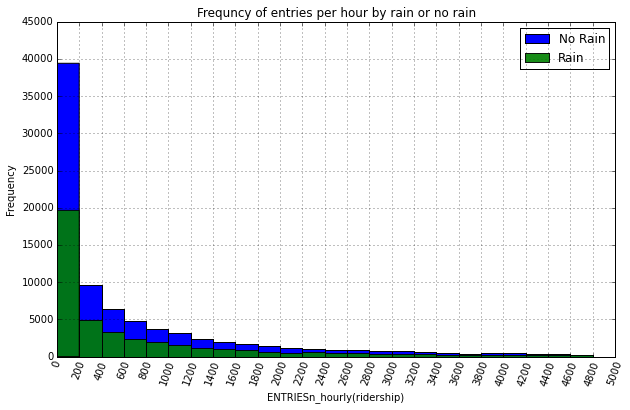

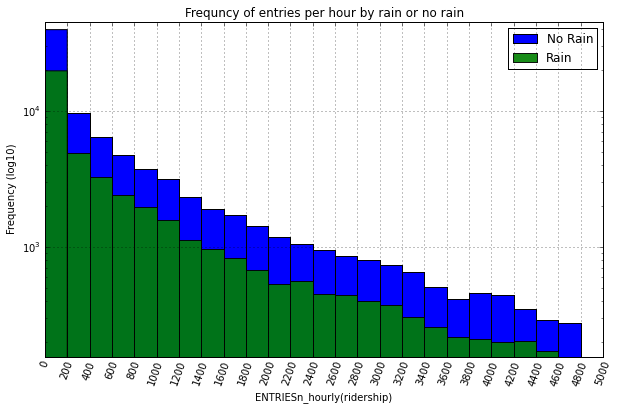

(None, '\n', None)


In [16]:
def entries_histogram(turnstile_weather):
    '''
    Before we perform any analysis, it might be useful to take a
    look at the data we're hoping to analyze. More specifically, let's 
    examine the hourly entries in our NYC subway data and determine what
    distribution the data follows. This data is stored in a dataframe
    called turnstile_weather under the ['ENTRIESn_hourly'] column.
    
    Let's plot two histograms on the same axes to show hourly
    entries when raining vs. when not raining. Here's an example on how
    to plot histograms with pandas and matplotlib:
    turnstile_weather['column_to_graph'].hist()
    '''
    ## Convert csv to pandas dataframe for easier analysis and plotting
    turnstile_weather = pd.read_csv(turnstile_weather)
    
    def plotHist(turnstile_weather, logY=False):
        #plt.figure()
        #plot a historgram for hourly entries when it is not raining
        turnstile_weather['ENTRIESn_hourly'][turnstile_weather['rain'] == 0].\
        hist(bins=range(0, 5000, 200), label = 'No Rain') 
    
        ## plot a historgram for hourly entries when it is raining
        turnstile_weather['ENTRIESn_hourly'][turnstile_weather['rain'] == 1].\
        hist(bins= range(0,5000,200), alpha =.9, label = 'Rain') 
    
        ## adjust the breaks of x axis ticks
        plt.xticks(np.arange(min(turnstile_weather['ENTRIESn_hourly']),\
                             max(turnstile_weather['ENTRIESn_hourly']),\
                             200))
        ## rotate tick labels for easier reading
        plt.xticks(rotation=70) 
    
        ## remove outlier data from the figure by narrowing boundaries
        plt.xlim(0,4800)
        ## Adjust for log transforming y
        if logY:
            plt.yscale('log', nonposy='clip')
            plt.ylabel('Frequency (log10)')
        else:
            plt.ylabel('Frequency')
        plt.ylim(0,45000)
        
        plt.legend(loc='upper right')
        plt.title('Frequncy of entries per hour by rain or no rain')
        plt.xlabel('Hourly Turnstile Entries')
        
        plt.show()
    
    plotHist(turnstile_weather)
    plotHist(turnstile_weather, logY=True)

    return None
    
if __name__=="__main__":
    entries_histogram("turnstile_data_master_with_weather.csv")

####Does entries data from the previous exercise seem normally distributed?  
####Answer:       
No, it is heavily skewed, right skewed, normal or  Gaussian distributions tend to be more bell-shaped.         
####Can we run Welch's T-test on entries data? Why or why not?       
####Answer:      
I don't believe so (we could run the test but the result would not be sensical), Welch's t-test allows for unequal variance but assumes both groups of data are drawn from Gaussian distributions. Our data are clearly not drawn from a normal distribution although they may have similar variance. What we need instead is a test that does not assume a normal distribution.        
     
**Reference** GraphPad statistical guide:  [http://www.graphpad.com/guides/prism/6/statistics/index.htm?stat_the_unequal_variance_welch_t_t.htm](http://www.graphpad.com/guides/prism/6/statistics/index.htm?stat_the_unequal_variance_welch_t_t.htm)   
Plotting: [http://matplotlib.org/users/pyplot_tutorial.html](http://matplotlib.org/users/pyplot_tutorial.html)
***

####Documentation for following code methods      
[http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)
[http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)
    

In [22]:
def mann_whitney_plus_means(turnstile_weather):
    '''
    This function will consume the turnstile_weather dataframe containing
    our final turnstile weather data. 
    
    You will want to take the means and run the Mann Whitney U-test on the 
    ENTRIESn_hourly column in the turnstile_weather dataframe.
    
    This function should return:
        1) the mean of entries with rain
        2) the mean of entries without rain
        3) the Mann-Whitney U-statistic and p-value comparing the number of entries
           with rain and the number of entries without rain
    
    You should feel free to use scipy's Mann-Whitney implementation, and you 
    might also find it useful to use numpy's mean function.
    
    Here are the functions' documentation:
    http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
    
    You can look at the final turnstile weather data at the link below:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    '''
    
    turnstile_weather = pd.read_csv(turnstile_weather)
    rain_entries = turnstile_weather['ENTRIESn_hourly'][turnstile_weather['rain'] == 1]
    noRain_entries = turnstile_weather['ENTRIESn_hourly'][turnstile_weather['rain'] == 0]
    
    # for evaluating U-statistic, if U value much lower then this
    # result then there exists a difference
    with_rain_mean = np.mean(rain_entries)
    without_rain_mean = np.mean(noRain_entries)
    
    U,p = scipy.stats.mannwhitneyu(rain_entries, noRain_entries)
    
    return "with rain mean = {0}\nwithout rain mean = {1}\nU-statistic = {2}\n\
one-tail p-value = {3}\ntwo-tail p-value = {4}".\format(with_rain_mean,\
                                                        without_rain_mean,\
                                                        U,p,p*2)

if __name__ == '__main__':
    print mann_whitney_plus_means("turnstile_data_master_with_weather.csv")

with rain mean = 1105.44637675
without rain mean = 1090.27878015
U-statistic = 1924409167.0
one-tail p-value = 0.0249999127935
two-tail p-value = 0.049999825587


####Is the distribution of the number of entries statistically different between rainy & non rainy days?  
####Answer:  
Yes  

####Describe your results and the methods used         
####Answer:             

As found earlier in our analysis the data does not appear to be normally distributed (Gaussian), thus the use of a Mann-Whitney U-Test which does not assume any particular distribution to the data. If we perform the test using the means of our two data groups; entries hourly with rain and entries hourly without rain, we will return a one-tail p-value of .024999. As a reminder, the Mann-Whitney U-Test is a statistical comparison of the means of the two samples provided and the null hypothesis is that the distributions of both groups are identical. In our case the null hypothesis is that entries hourly with rain is distributed statistically the same as entries hourly without rain.

We are interested in determining whether the presence of rain has any affect on entries hourly(ridership) so we will need to multiple the p-value returned by the Mann-Whitney test to achieve the two-tailed p-value test statistic which will indicate if any difference in distributions is likely present. If our significance level (α value) is .05 which would result in the null hypothesis being rejected only 5% of the time when it is in fact true, the critical value for our p-statistic is p <= .05. Given our two-tailed p-value of .049999 and critical value of .05 we can state a statistically significant difference, in short there is a difference in ridership between rainy and non-rainy days. The two-tailed p-value is just under the critical value and I would suggest that we look at each distributions median and Inter-Quartile-Ranges in order to acquire a better grasp on the differences between these two groups.

**References**:Udacity Intro to Data Science Lesson 3,[http://www.statisticssolutions.com/mann-whitney-u-test-2/](http://www.statisticssolutions.com/mann-whitney-u-test-2/),  [http://www.graphpad.com/guides/prism/6/statistics/index.htm?how_the_mann-whitney_test_works.htm](http://www.graphpad.com/guides/prism/6/statistics/index.htm?how_the_mann-whitney_test_works.htm), [http://www.isixsigma.com/tools-templates/hypothesis-testing/making-sense-mann-whitney-test-median-comparison/](http://www.isixsigma.com/tools-templates/hypothesis-testing/making-sense-mann-whitney-test-median-comparison/), Difference between one-tail/two-tailed test: [http://www.graphpad.com/guides/prism/6/statistics/one-tail_vs__two-tail_p_values.htm](http://www.graphpad.com/guides/prism/6/statistics/one-tail_vs__two-tail_p_values.htm)

In [25]:
# Median and IQR ranges for rain and no rain
def turnstile_distributions(turnstile_weather_data):
    df = pd.read_csv(turnstile_weather_data)
    with_rain_median = np.median(df['ENTRIESn_hourly'][df['rain'] == 1])
    with_rain_IQR = np.subtract(*np.percentile(df['ENTRIESn_hourly'][df['rain'] == 1],\
                                               [75, 25]))
    without_rain_median = np.median(df['ENTRIESn_hourly'][df['rain'] == 0])
    without_rain_IQR = np.subtract(*np.percentile(df['ENTRIESn_hourly'][df['rain'] == 0],\
                                                  [75, 25])) 
    
    return with_rain_median, without_rain_median, with_rain_IQR, without_rain_IQR
           

if __name__ == '__main__':
    w_rain_median,wo_rain_median,\
    w_rain_IQR,wo_rain_IQR = turnstile_distributions("turnstile_data_master_with_weather.csv")
    
    print "With rain median = {0}\nWithout rain median = {1}\nWith rain IQR = {2}\
\nWithout rain IQR = {3}".format(w_rain_median,\
                                     wo_rain_median,\
                                     w_rain_IQR,\
                                     wo_rain_IQR)

With rain median = 282.0
Without rain median = 278.0
With rain IQR = 1062.25
Without rain IQR = 1073.0


**Refereced**: [stackoverflow](http://stackoverflow.com/questions/23228244/how-do-you-find-the-iqr-in-numpy "http://stackoverflow.com/questions/23228244/how-do-you-find-the-iqr-in-numpy") for finding Interquartile range with numpy 

####Perform linear regression with gradient descent

In [57]:
"""
In this question, you need to:
1) implement the compute_cost() and gradient_descent() procedures
2) Select features (in the predictions procedure) and make predictions.

"""

def normalize_features(df):
    """
    Normalize(standardize/scale) the features in the data set.
    """
    mu = df.mean()
    sigma = df.std()
    
    if (sigma == 0).any():
        raise Exception("One or more features had the same value for all samples, and thus could " + \
                         "not be normalized. Please do not include features with only a single value " + \
                         "in your model.")
    # subtract the mean and divide by standard deviation
    df_normalized = (df - df.mean()) / df.std()

    return df_normalized, mu, sigma

def compute_cost(features, values, theta):
    """
    Compute the cost function given a set of features / values, 
    and the values for our thetas.
    
    This can be the same code as the compute_cost function in the lesson #3 exercises,
    but feel free to implement your own.
    """
    
    m = len(values)
    # matrix multiple weights(thetas)/coeffficients with variables (features)
    predictions_from_weights = np.dot(features,theta)
    # square the difference between guess and the correct outcome
    sqrErrors = np.square(predictions_from_weights - values)
    
    cost = 1/float(2*m) * np.sum(sqrErrors)

    return cost

def gradient_descent(features, values, theta, alpha, num_iterations):
    """
    Perform gradient descent given a data set with an arbitrary number of features.
    
    This can be the same gradient descent code as in the lesson #3 exercises,
    but feel free to implement your own.
    """
    
    m = len(values)
    cost_history = []

    for i in range(num_iterations):
        # find the derivative or the direction of greatest gain
        p_derivative = (1/float(m)) * np.dot(np.transpose(features),(np.dot(features,theta)-values))
        # pass direction to theta and take a small step
        theta_updater = alpha * p_derivative
        # reverse the direction to head toward optimal(least) cost
        theta = theta - theta_updater
        cost_history.append(compute_cost(features, values, theta))
        
    return theta, pd.Series(cost_history)

def predictions(dataframe):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    You can download the complete turnstile weather dataframe here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv    
    
    Your prediction should have a R^2 value of 0.20 or better.
    You need to experiment using various input features contained in the dataframe. 
    We recommend that you don't use the EXITSn_hourly feature as an input to the 
    linear model because we cannot use it as a predictor: we cannot use exits 
    counts as a way to predict entry counts. 
    
    If you'd like to view a plot of your cost history, uncomment the call to 
    plot_cost_history below. 
    
    If you are using your own algorithm/models, see if you can optimize your code so 
    that it runs faster.
    '''
    # Select Features (try different features!)
    features = dataframe[['rain', 'precipi', 'Hour', 'meantempi','fog']]
    
    # Add UNIT to features using dummy variables
    dummy_units = pd.get_dummies(dataframe['UNIT'], prefix='unit')
    dummy_dates = pd.get_dummies(dataframe['DATEn'], prefix='')
    features = features.join(dummy_units)
    features = features.join(dummy_dates)
    
    # Values, labels, outcome
    values = dataframe['ENTRIESn_hourly']
    m = len(values)

    features, mu, sigma = normalize_features(features)
    features['ones'] = np.ones(m) # Add a column of 1s (y intercept)
    
    # Convert features and values to numpy arrays
    features_array = np.array(features)
    values_array = np.array(values)

    # Set values for alpha, number of iterations.
    alpha = 0.01 # please feel free to change this value
    num_iterations = 300 # please feel free to change this value

    # Initialize theta, perform gradient descent
    theta_gradient_descent = np.zeros(len(features.columns))
    theta_gradient_descent, cost_history = gradient_descent(features_array, 
                                                            values_array, 
                                                            theta_gradient_descent, 
                                                            alpha, 
                                                            num_iterations)
    
    plot = None
    # -------------------------------------------------
    # Uncomment the next line to see your cost history
    # -------------------------------------------------
    #print dataframe.columns
    #plot = plot_cost_history(alpha, cost_history)
    #print cost_history
    
    
    predictions = np.dot(features_array, theta_gradient_descent)
    return predictions, plot


def plot_cost_history(alpha, cost_history):
    '''
    This function is for viewing the plot of your cost history.
    You can run it by uncommenting this
    
       plot_cost_history(alpha, cost_history) 
    
    call in predictions.
    If you want to run this locally, you should print the return value
    from this function.
    '''
    cost_df = pd.DataFrame({
       'Cost_History': cost_history,
       'Iteration': range(len(cost_history))
    })
    return ggplot(cost_df, aes('Iteration', 'Cost_History')) + \
            geom_point() + ggtitle('Cost History for alpha = %.3f' % alpha )


if __name__=="__main__":
    turnstile_weather = pd.read_csv("turnstile_data_master_with_weather.csv")
    predictions = predictions(turnstile_weather)
    print predictions

(array([ 2699.17364834,  2950.37216495,  3201.57068157, ...,   472.43620986,
         472.43620986,   472.43620986]), None)


####Plot the residuals from the prior linear regression model

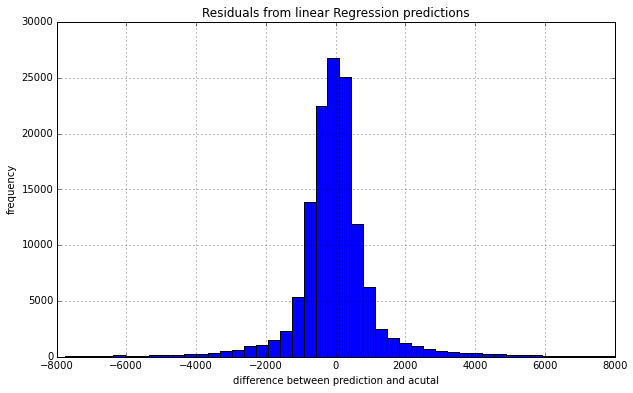

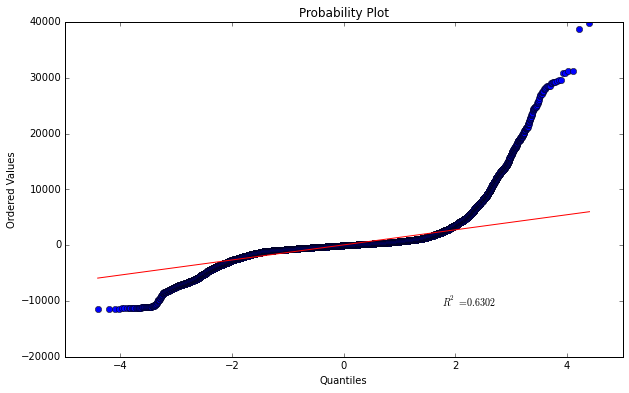

In [58]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 6

def plot_residuals(turnstile_weather, predictions):
    '''
    Using the same methods that we used to plot a histogram of entries
    per hour for our data, why don't you make a histogram of the residuals
    (that is, the difference between the original hourly entry data and the predicted values).
    Try different binwidths for your histogram.

    Based on this residual histogram, do you have any insight into how our model
    performed?  Reading a bit on this webpage might be useful:

    http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm
    '''
    
    plt.figure(1)
    (turnstile_weather['ENTRIESn_hourly'] - predictions).hist(bins = 150)
    plt.title('Residuals from linear Regression predictions')
    plt.xlabel('difference between prediction and acutal')
    plt.ylabel('frequency')
    plt.xlim(-8000,8000)
    #plt.savefig("residuals_histo.png")
    
    plt.figure(2)
    scipy.stats.probplot((turnstile_weather['ENTRIESn_hourly'] - predictions),plot = plt)
    #plt.savefig("residuals_probility_plot.png")
    return plt.show(1),plt.show(2)
if __name__=="__main__":
    plot_residuals(turnstile_weather,predictions[0])

Plots suggest that a linear regression with the supplied features fails to capture the real world outcomes with very good accuracy. These residuals plots suggest either a transformation log of the data or a different model such a polynomial regression. 

**References**: [http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm](http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm)
*** 

####Compute the $R^2$ values for the gradient descent

Documentation about numpy.mean(), numpy.sum() and numpy.square() below:
[http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)
[http://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html](http://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html)
[http://docs.scipy.org/doc/numpy/reference/generated/numpy.square.html](http://docs.scipy.org/doc/numpy/reference/generated/numpy.square.html)


In [59]:
def compute_r_squared(data, predictions):
    '''
    In exercise 5, we calculated the R^2 value for you. But why don't you try and
    and calculate the R^2 value yourself.
    
    Given a list of original data points, and also a list of predicted data points,
    write a function that will compute and return the coefficient of determination (R^2)
    for this data.  numpy.mean() and numpy.sum() might both be useful here, but
    not necessary.

    Documentation about numpy.mean() and numpy.sum() below:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html
    '''
    
    # your code here
    r_squared = 1 - ((np.square(data - predictions).sum()) / (np.square(data-np.mean(data))).sum())
    
    return r_squared

if __name__=="__main__":
    R_sqrd = compute_r_squared(turnstile_weather['ENTRIESn_hourly'],predictions[0])
    print "The R^2 value for gradient descent = {0}".format(R_sqrd)

The R^2 value for gradient descent = 0.469653748762


####Perform your own regression analysis and report the results  

The following code will be implemented using some of sklearn's extremely powerful modules. As this is a playground for implementing different machine learning algorithms I tried out several of them. I didn't see evidence of cross-validation in the provided code prompts however I performed cross-validation of the turnstile data using sklearn's preprocessing packages and generated the $R^2$ values using the predictions from the models and the 'test' values set aside from the cross-validation. I did set up a PCA to reduce the data set simply for practice but as I could get my best $R^2$ when not implementing the PCA, I choose not to use it for my final model. I also attempted to perform a feature selection using L1 linear support vector support classification but found that my machine could not handle the calculations.

More in-depth information can be found for the following models at: [http://scikit-learn.org/stable/modules/linear_model.html](http://scikit-learn.org/stable/modules/linear_model.html)  


In [60]:

"""
In this optional exercise, you should complete the function called 
predictions(turnstile_weather). This function takes in our pandas 
turnstile weather dataframe, and returns a set of predicted ridership values,
based on the other information in the dataframe.  

In exercise 3.5 we used Gradient Descent in order to compute the coefficients
theta used for the ridership prediction. Here you should attempt to implement 
another way of computing the coeffcients theta. You may also try using a reference implementation such as: 
http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.html

One of the advantages of the statsmodels implementation is that it gives you
easy access to the values of the coefficients theta. This can help you infer relationships 
between variables in the dataset.

You may also experiment with polynomial terms as part of the input variables.  

The following links might be useful: 
http://en.wikipedia.org/wiki/Ordinary_least_squares
http://en.wikipedia.org/w/index.php?title=Linear_least_squares_(mathematics)
http://en.wikipedia.org/wiki/Polynomial_regression

This is your playground. Go wild!

How does your choice of linear regression compare to linear regression
with gradient descent computed in Exercise 3.5?

You can look at the information contained in the turnstile_weather dataframe below:
https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
"""
def dataprep(filepath):
    '''
    Take turnstile master with weather file, clean and prep the data for 
    furhter analysis. Return numpy array of normalized/scaled features sans non quantitative values with 
    dummy variables added for Units and Dates as a numpy vector.
    '''
    df = pd.read_csv(filepath)
    # Remove unamed column that pd.read_csv inserted. note: Not sure why it did 
    # I will have to look into it further.
    df.drop('Unnamed: 0',1,inplace=True)
    # Pull the day from the date feature and make a new column for it
    df['Day']=df['DATEn'].apply(lambda x :datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%a'))
    #print df['DATEn']
    # Add UNIT  and DATEn to features using dummy variables
    dummy_units_Unit = pd.get_dummies(df['UNIT'], prefix='unit')
    dummy_units_Day = pd.get_dummies(df['Day'])
    # Add Dates to features using dummy variable
    #dummy_dates = pd.get_dummies(df['DATEn'])
    df = df.join([dummy_units_Unit])
    df = df.join([dummy_units_Day])
    # remove non-quantitative values,Exits hourly, and less-influential features
    data_df = df.drop(['UNIT','DATEn','TIMEn','DESCn','EXITSn_hourly','Day','thunder'],1)
    # seperate into features and outcome values
    features = data_df.drop(['ENTRIESn_hourly'],1)
    values = data_df[['ENTRIESn_hourly']]
    # save the feature headings
    feature_headers = features.columns.values
    # convert features to numpy array and normalize them
    #features_normd = scale(features.values.astype(float))
    return features,values,feature_headers

def cross_val(features,values):
    '''
    Split features and values data set into a training and test data set,
    60% train 40% test.
    '''
    X_train,X_test,y_train,y_test = cross_validation.train_test_split\
    (features, values, test_size=0.4, random_state=42)
    
    return X_train,X_test,y_train,y_test
    
def scaler(data_set):
    '''
    Standardize features by substract the mean and dividing by standard deviation.
    Pass in numpy array and returns standarded scaled version of data set along with 
    the mean and standard deviation for reversing the process.
    '''
    scaler = StandardScaler()
    mu = scaler.fit(data_set).mean_
    sigma = scaler.fit(data_set).std_
    
    return scaler.transform(data_set),mu,sigma

def PCA_feature_selection(features_scaled,num_components):
    ''' 
    Reduce the number of features using PCA. Pass prepped numpy array and the number of
    components desired or the percentage explained by components. Returns a reduced dataframe.
    
    '''
    #print features_normd.shape
    pca = PCA(n_components = num_components)
    features_reduced = pca.fit_transform(features_scaled)
    
    return features_reduced

def predictions(weather_turnstile_data):

    predictions = []
    
    # convert into a format suitable for modeling
    features, values, feature_headers = dataprep(weather_turnstile_data) 
    
    # scale feature
    features_scaled = scaler(features) # scale features
    
    # feature selection using PCA
    # if value between 0 and 1 this return return the number of compenents neccessary 
    # to represent the given percentage of variance
    #features_reduced = PCA_feature_selection(features_scaled[0], .9) 
    
    # feature selection using L1 norm
    #features_sel = LinearSVC(C=0.1, penalty="l1", dual=False).fit_transform(features_scaled[0], values)

    # Create cross-validation samples
    X_train,X_test,y_train,y_test = cross_val(features_scaled[0],values) # split into train and test data sets
    
    #print feature_headers
    
    #ordinary least squares regression
    clf_linearReg = linear_model.LinearRegression()
    clf_linearReg.fit(X_train,y_train)
    print("Coefficient of determination for ordinary least squares linear regression; training: %.4f"
      % clf_linearReg.score(X_train,y_train)),'\n'
    #coef_OLS = {feature_headers[i]: c for i,c in enumerate(clf_linearReg.coef_[0])}
    #for key in coef_OLS:
    #    if "unit" not in key:
    #        print key,' : ', coef_OLS[key]
    predictions.append("Residual sum of squares for ordinary least squares linear regression; test: %.4f"
      % clf_linearReg.score(X_test,y_test))
    
    # Ridge Regression, addresses some of ordinary least squares downsides, i.e. OLS relies
    # on independence of model terms and doesn't handle colinearity or feature terms
    # well
    
    # using cross-val to find best alpha param, cross-val defaults to Generalized Cross-Validation a
    # leave on out approach. 
    clf_RidgeCV = linear_model.RidgeCV(alphas=[0.01,0.03,.06,0.1, 1.0, 10.0]) 
    clf_RidgeCV.fit(X_train,y_train)
    print("Coefficient of determination for Ridge regression; training: %.4f"
      % clf_RidgeCV.score(X_train,y_train)),'\n'
    #coef_Ridge = {feature_headers[i]: c for i,c in enumerate(clf_RidgeCV.coef_[0])}
    #for key in coef_Ridge:
    #    if "unit" not in key:
    #        print key,' : ', coef_Ridge[key]
    predictions.append("Coefficient of determination for Ridge regression; test: %.4f"
      % clf_RidgeCV.score(X_test,y_test))
    
    # Use Lasso regression with best of given alphas
    alphas=[0.01,0.03,.06,0.1, 1.0, 10.0]
    regr = linear_model.Lasso(max_iter = 1000)
    # fit and score lasso model, we will use this to find the alpha that gives us the highest
    # R^2
    scores = [regr.set_params(alpha=alpha
             ).fit(X_train, y_train
             ).score(X_train,y_train)
        for alpha in alphas]
    # Set the alpha for the lasso model associated with the highest R^2
    best_alpha = alphas[scores.index(max(scores))]
    #print best_alpha
    regr.alpha = best_alpha
    regr.fit(X_train, y_train)
    print ("Coefficient of determination for lasso regression with optimal alpha; training: %.4f"
      % regr.score(X_train,y_train)),'\n'
    #coef_Lasso = {feature_headers[i]: c for i,c in enumerate(regr.coef_)}
    #for key in coef_Lasso:
    #    if "unit" not in key:
    #        print key,' : ', coef_Lasso[key]
    predictions.append("Coefficient of determination for lasso regression with optimal alpha; test: %.4f"
      % regr.score(X_test,y_test))
    
    return predictions
        
if __name__=="__main__":
    print predictions("turnstile_data_master_with_weather.csv")


Coefficient of determination for ordinary least squares linear regression; training: 0.4742 

Coefficient of determination for Ridge regression; training: 0.4742 

Coefficient of determination for lasso regression with optimal alpha; training: 0.4742 

['Residual sum of squares for ordinary least squares linear regression; test: 0.4609', 'Coefficient of determination for Ridge regression; test: 0.4609', 'Coefficient of determination for lasso regression with optimal alpha; test: 0.4608']


**What approach did you use to compute the coefficients theta and produce predictions for ENTRIESn_hourly in your regression model:**   
*Answer*:  

* I tried out three different approaches each of which were from the family of generalized linear models. Before I implemented these different models I used sklearn's cross-validation module to split the weather-turnstile data into training and test data sets. I choose to perform Ordinary Least Squares regression which given the features I provided returned a coefficient of determination of .4742 for the training data, using the training data to test my model was done simply replicate the process used for the analysis of the gradient descent model. The prediction value for the test data was .4609, slightly less then the training data. Then hypothesising that there might be some collinearity in my feature choices I implemented a Ridge regression with sklearn's Cross-Validation to discover the best $\alpha$ for the Ridge parameter. After discovering a .01 $\alpha$ as providing the best outcome I fitted the training and test data and arrived at different coefficients but similar $R^2$ outcomes for both the training and test predictions. Finally I implemented a Lasso model out of interest in determining how important all of the over 400 features were. The same coefficient of determination resulted and almost all of the feature coefficients were non-zero or of some relevancy (I had originally included thunder as a feature but the lasso model indicated that it had no beneficial effect for my model so I removed it in all my models). The $R^2$ of greatest importance in my opinion is the test data results as these reflect the predictive power of the models on data it has yet to seen.

**What features (input variables) did you use in your model? Did you use any dummy variables as part of your features? and Why did you select these features in your model?**  
*Answer*:     
* __features__:         
    + Hour
    + maxpressurei
    + maxdewpti
    + mindewpti
    + minpressurei
    + meandewpti
    + meanpressurei
    + fog
    + rain
    + meanwindspdi
    + mintempi
    + meantempi
    + maxtempi
    + precipi
* __dummy variables__:
    + unit_R001,...,unit_R552
    + Mon-Sun    

I began with selecting the same features that were used in the gradient descent as I wanted to show that a different model could perform at least as well. I then added in the dew point features min, max and mean as I believed that they might affect individuals perceptions of wetness and play a part in their decision to use public transit. Along those same lines I choose to add in the pressure measurements as they are often correlated with weather changes and subsequent rain, fog or sun. Although these variables' added predictive value was minimal they did slightly increase my $R^2$ so I continued to include them in my models. Dummy variables were inserted for all of the units or stations, believing that different stations will have different sizes, ridership numbers, and types of commuter crowds. For instance some stations located more centrally in the city may services those commuters who possess no other method of transportation, these individuals will not be influenced by weather, as a result those stations ridership numbers are likely to be fairly constant. Finally I included dummy variables for the days of the week, some EDA (exploratory data analysis) showed that there exists significant differences in ridership numbers between weekdays and weekends and I wished my models to attempt to capture this.   

**What are the coefficients (or weights) of the non-dummy features in your linear regression model?**    
*Answer*:    

  features   |       OLS       |     Ridge      | Lasso   
-------------|-----------------|----------------|---------------   
maxtempi     |  -482.477420711 | -391.91265126  | -312.379844607   
mindewpti    |  -27.258708005  | -21.0218932493 | -10.9714495665    
mintempi     | -445.264429877  | -367.999558743 | -294.095652282    
precipi      |  -27.3566422136 | -27.5914320474 | -28.1350262604  
Hour         |  463.039605743  | 463.010900047  | 463.058269056   
minpressurei |  181.502139943  | 179.424656574  | 181.688854054  
meantempi    | 759.893357624   | 602.588036787  | 460.368397499    
meanpressurei| -274.342152448  | -269.069940518 | -274.243917544    
maxpressurei | 96.6769487111   | 91.9957322117  | 94.5342533145     
meandewpti   | -65.6707608471  | -67.6026868657 | -81.8186731865     
maxdewpti    | 171.150244187   | 164.823559506  | 165.093867455   
rain         | -86.9443182534  | -86.9995264598 | -87.0673771369   
fog          | 49.6920616517   | 51.5821892669  | 54.043295498   
meanwindspdi | -6.32591466804  | -7.18027121358 | -8.11980563306          



**What is your model(s) R^2(coefficients of determination) value?**   
*Answer*:    
* Training data $R^2$ = .4742    
* Test data $R^2$ = .4609

**What does this R^2 value mean for the goodness of fit for your regression model? Do you think this linear model to predict the ridership is appropriate for this dataset. Given the R^2 value?**   
*Answer*:  

* $R^2$ is the measure of variability in our data explained or caught by our model. For example, an $R^2$ value of 0 would suggest that a model's line of best fit, in my case a linear line, explained 0 percent of the variance in the data strongly indicating no linear relationship between the dependent variable, entries hourly and the independent factors, i.e. all the other variables I included in my model (in other words such a model would not be able to make any accurate prediction about future ridership numbers). Conversely had I received an $R^2$ value of 1.0, this would suggest that the dependent and independent variables were perfectly linearly correlated and my linear regression had caught or modeled that correlation exactly (suggesting that the model should be able to predict with perfect accuracy future ridership numbers). What does this mean for my model? If I use the test data $R^2$ value of .4609 which is more reflective of a real world use case, as the training data $R^2$ value had the benefit of already knowing the actual entries hourly, the coefficient of determination would indicate weak linear correlation between the data. As explained above my linear model would have caught or explained roughly 46% of the variance in the data, indicating the data likely has some relationship or correlation with each other but that relationship is not perfectly linear. Graphing the residuals with a probability plot would likely look similar to the linear regression with gradient descent probability graph in problem set 3. I would consider trying alternative models such as; polynomial regression, support vector regression or decision tree regression to see if I couldn't find a model that captures more of the variance in our data, this would be reflected by a higher $R^2$ value, closer to 1, which would lead to better predictions of ridership numbers. 

<a id="Problem Set 4 - Visualizing Subway Data"></a>
****

##Problem Set 4 - Visualizing Subway Data  

####Plot some more graphs of the data feel free to play around

If you'd like to learn more about ggplot and its capabilities, take a look at the documentation at:    
[https://pypi.python.org/pypi/ggplot/](https://pypi.python.org/pypi/ggplot/) 

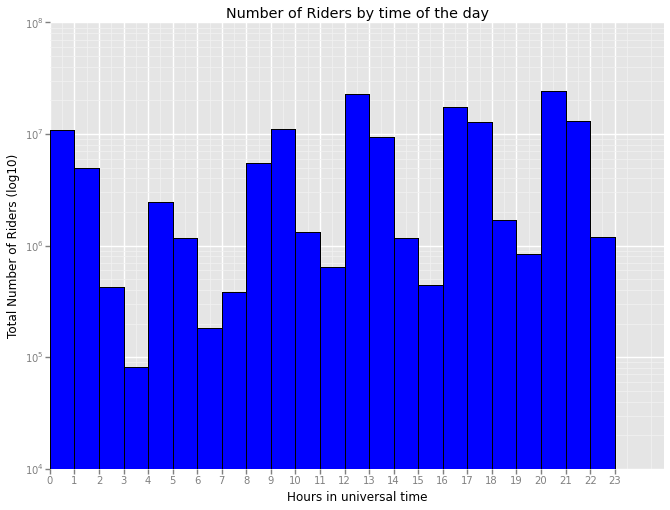

<ggplot: (283688733)>


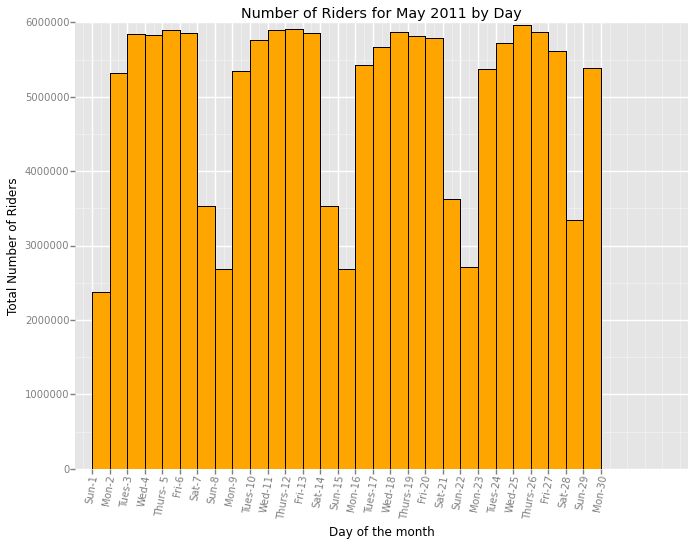

<ggplot: (293392161)>


In [61]:
def plot_weather_data(turnstile_weather):
    '''
    You are passed in a dataframe called turnstile_weather. 
    Use turnstile_weather along with ggplot to make a data visualization
    focused on the MTA and weather data we used in assignment #3.  
    You should feel free to implement something that we discussed in class 
    (e.g., scatterplots, line plots, or histograms) or attempt to implement
    something more advanced if you'd like.  

    Here are some suggestions for things to investigate and illustrate:
     * Ridership by time of day or day of week
     * How ridership varies based on Subway station
     * Which stations have more exits or entries at different times of day

    If you'd like to learn more about ggplot and its capabilities, take
    a look at the documentation at:
    https://pypi.python.org/pypi/ggplot/
     
    You can check out:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
     
    To see all the columns and data points included in the turnstile_weather 
    dataframe. 
     
    '''
    turnstile_weather = pd.read_csv(turnstile_weather)
    turnstile_weather = turnstile_weather.iloc[:,1:len(turnstile_weather.columns)]
    
    # Use group_by to aggregate Entries hourly by hours
    RiderShip_by_Time = turnstile_weather.groupby(['Hour']).sum().ENTRIESn_hourly
    ## My attempt to plot a facet with date, this is not supported for geom_bar
        #RiderShip_by_Time = turnstile_weather.groupby(['DATEn','Hour']).sum().ENTRIESn_hourly
        #RiderShip_by_Time = RiderShip_by_Time.to_frame(name='Total_Riders').reset_index()
    
    RiderShip_by_Time = pd.DataFrame({'Hours' : RiderShip_by_Time.index, 'Total_Riders':RiderShip_by_Time.values})
    
    # Use group_by to aggregate up to the date
    RiderShip_by_Day = turnstile_weather.groupby('DATEn').sum().ENTRIESn_hourly
    RiderShip_by_Day = pd.DataFrame({'Date' : pd.to_datetime(RiderShip_by_Day.index).day, 'Total_Riders' : RiderShip_by_Day.values})
    
    
    '''
    #RiderShip_by_Station = turnstile_weather.groupby('UNIT').sum().ENTRIESn_hourly
    #RiderShip_by_Station = DataFrame({'Station' : RiderShip_by_Station.index, 'Total_Riders':RiderShip_by_Station.values})
    #print RiderShip_by_Station.shape
    
    #RiderShip_by_station_and_Time = turnstile_weather
    #RiderShip_by_station_and_Time['Diff_btw_EntExts'] = RiderShip_by_station_and_Time['ENTRIESn_hourly'] - RiderShip_by_station_and_Time['EXITSn_hourly']
    #df = RiderShip_by_station_and_Time.groupby(['Hour','UNIT']).sum().Diff_btw_EntExts
    #print df.values
    #RiderShip_by_Station_and_Time = DataFrame({'Hour':Series([i[0] for i in df.index.values]),'Station' : Series([i[1] for i in df.index.values]), 'Diff_btw_EntExts':df.values})
    #print RiderShip_by_Station_and_Time.head()
    '''
    
    
    plot1 = ggplot(RiderShip_by_Time,aes(x='Hours', weight = 'Total_Riders')) + \
        geom_bar(binwidth = 1,color = 'black', fill = 'blue') + \
        xlab('Hours in universal time') + \
        ylab('Total Number of Riders (log10)') + \
        scale_y_log10() + \
        scale_x_continuous(breaks = range(0,24)) + \
        ggtitle('Number of Riders by time of the day')
    print(plot1)
    #ggsave("ridership_by_time.png")
    
    plot2 = ggplot(RiderShip_by_Day,aes(x='Date')) + \
        geom_bar(aes(weight='Total_Riders'),binwidth = 1, color = 'black', fill = 'orange') + \
        xlab('Day of the month') + \
        ylab('Total Number of Riders') + \
        scale_x_discrete(breaks = range(1,31,1), labels = ['Sun-1','Mon-2','Tues-3','Wed-4','Thurs- 5', 'Fri-6','Sat-7','Sun-8','Mon-9','Tues-10','Wed-11','Thurs-12','Fri-13','Sat-14','Sun-15','Mon-16','Tues-17','Wed-18','Thurs-19','Fri-20','Sat-21','Sun-22','Mon-23','Tues-24','Wed-25','Thurs-26','Fri-27','Sat-28','Sun-29','Mon-30']) + \
        ggtitle('Number of Riders for May 2011 by Day') + \
        theme(axis_text_x = element_text(angle=80))
    print(plot2)
    #ggsave("ridership_by_day.png")
    '''
    Different approach to the last graph
    
    #turnstile_weather['Day']=pandas.DatetimeIndex(turnstile_weather['DATEn']).dayofweek
    turnstile_weather['Day'] = turnstile_weather.loc[:,'DATEn'].apply(lambda x: pd.datetime.strftime(pd.datetime.strptime(x,'%Y-%m-%d'),'%a'))
    RiderShip_by_Day = turnstile_weather.groupby('Day').sum().ENTRIESn_hourly
    RiderShip_by_Day = pd.DataFrame({'Day' : RiderShip_by_Day.index, 'Total_Riders' : RiderShip_by_Day.values})
    #print RiderShip_by_Day.head(30)
    plot = ggplot(RiderShip_by_Day,aes(x='Day')) + \
    geom_bar(aes(weight='Total_Riders'), color='black',fill='blue') + \
    xlab('Day') + \
    ylab('Total Number of Riders') + \
    ggtitle('Number of Riders by day') + \
    theme(axis_text_x = element_text(angle=75))
    
    #plot3 = ggplot(
    #plot = ggplot(RiderShip_by_Station, aes(x='Station'))+geom_bar(aes(weight='Total_Riders'), color='black', fill ='red') +xlab('Station')\
    #+ylab('Total Number of Riders')+ggtitle("Number of Riders by Station")+theme(axis_text_x = element_text(angle=90))
    '''
    return None #plot1,plot2   
if __name__=="__main__":
    warnings.simplefilter('ignore')
    plot_weather_data("turnstile_data_master_with_weather.csv")

*Note*:   
>Graphs show the riderships trends throughout a day with higher ridership around daytime hours, there does appear to be large ridership at midnight supporting the stereotype of the city that never sleeps. Clearly highlighted is the ridership differences between weekdays and weekends, likely a result of daily work commuters. This cyclic pattern would be important for a model to fit.

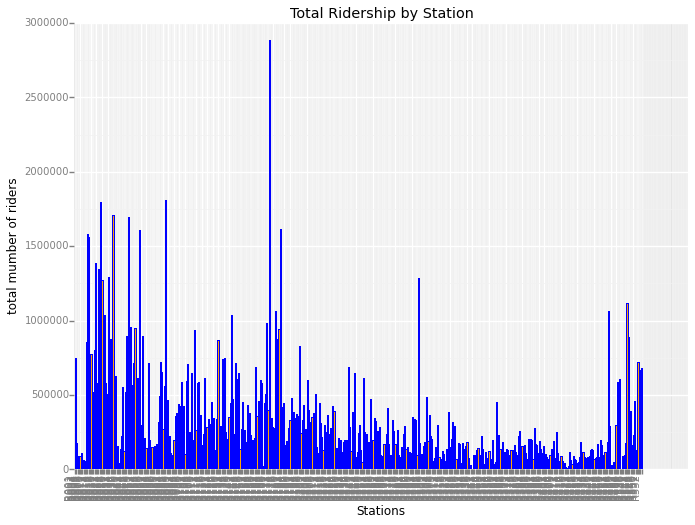

<ggplot: (281750309)>


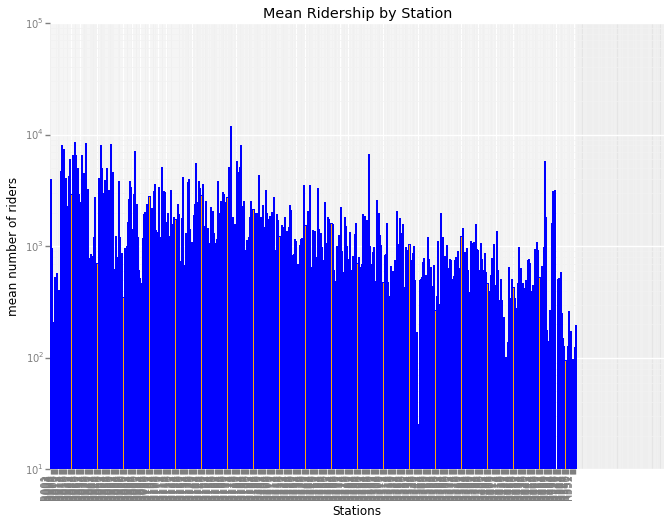

<ggplot: (281620133)>


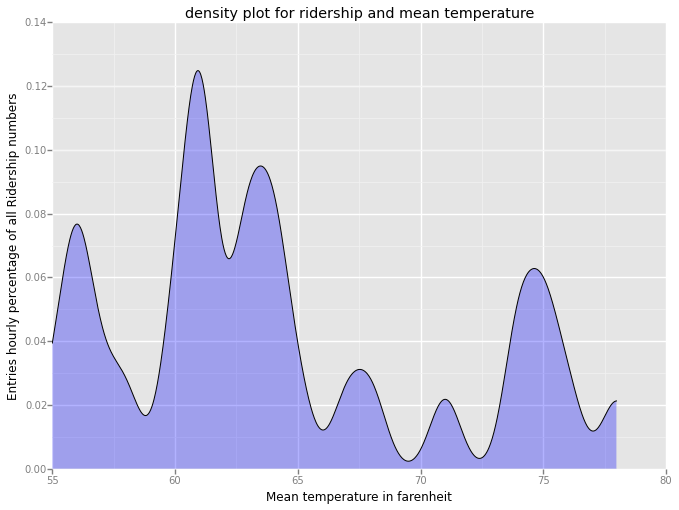

<ggplot: (283005537)>


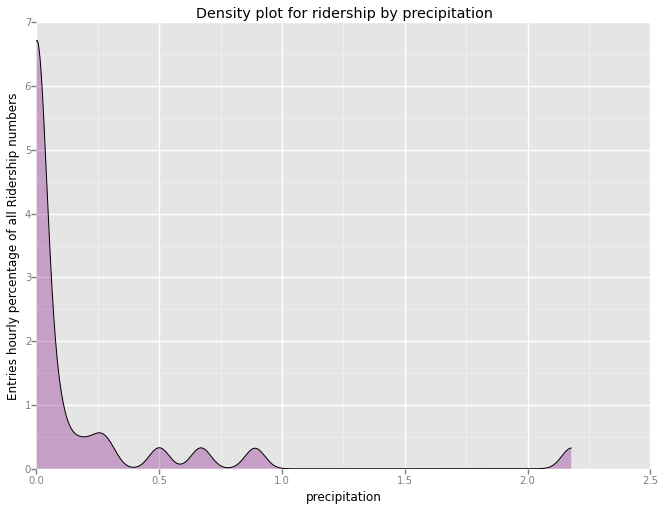

<ggplot: (278290537)>


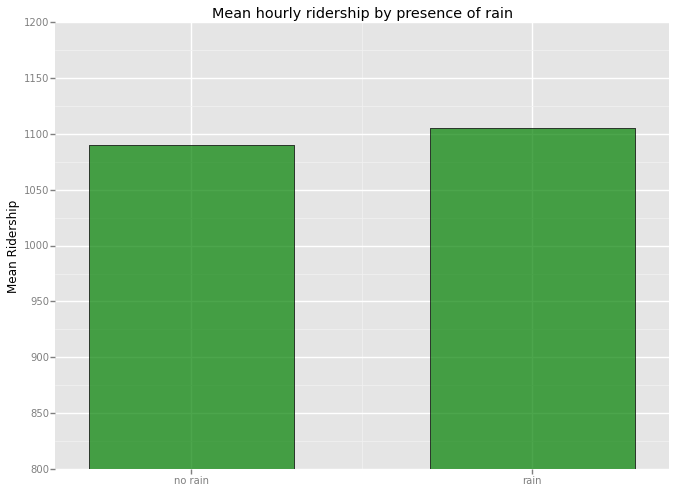

<ggplot: (301649157)>


In [62]:
def plot_weather_data(turnstile_weather):
    ''' 
    Plot_weather_data is passed a dataframe called turnstile_weather. 
    Use turnstile_weather along with ggplot to make another data visualization
    focused on the MTA and weather data we used in Project 3.
    '''
    # Not really viable graph, to many 'units', far to cluttered, works for 
    # very broad Idea of different ridership numbers between stations
    #plot1 = ggplot(turnstile_weather, aes(x = 'UNIT')) + \
    #            geom_histogram(aes(weight = 'ENTRIESn_hourly'), color = 'blue', fill = 'orange') + \
    #            theme(axis_text_x=element_text(angle = 90, hjust = 1 )) + \
    #            xlab("Stations") + \
    #            ylab("total mumber of riders") + \
    #            ggtitle("Total Ridership by Station")
    #print(plot1)
    # same issue as previous graph
    #plot2 = ggplot(turnstile_weather, aes(x = 'UNIT', y = 'ENTRIESn_hourly')) + \
    #            geom_bar(stat = 'summary', color = 'blue', fill = 'orange') + \
    #            theme(axis_text_x=element_text(angle = 90, hjust = 1 )) + \
    #            xlab("Stations") + \
    #            scale_y_log10() + \
    #            ylab("mean number of riders") + \
    #            ggtitle("Mean Ridership by Station")
    #print(plot2)
    plot3 = ggplot(turnstile_weather[['meantempi','ENTRIESn_hourly']], aes(x='meantempi')) +\
                geom_density(fill = "blue" , alpha = .3) + \
                ggtitle("density plot for ridership and mean temperature") + \
                xlab("Mean temperature in farenheit") + \
                ylab("Entries hourly percentage of all ridership numbers")
    print(plot3)
    plot4 = ggplot(turnstile_weather[['precipi','ENTRIESn_hourly']], aes(x='precipi')) + \
                geom_density(fill = 'purple', alpha = .3) + \
                ggtitle("Density plot for ridership by precipitation") + \
                xlab("precipitation") + \
                ylab("Entries hourly percentage of all ridership numbers")
    print(plot4)
    plot5 = ggplot(turnstile_weather, aes(x = 'rain', y='ENTRIESn_hourly', width=.6 )) + \
                geom_bar(stat = "summary",color ='black', fill = 'green', alpha = .7) + \
                scale_x_continuous(breaks = [0,1], labels = ('no rain','rain')) + \
                scale_y_continuous(limits = [800,1200], breaks = range(800,1200,50)) + \
                ggtitle("Mean hourly ridership by presence of rain") + \
                xlab("") + \
                ylab("Mean Ridership")
    print(plot5)           

    return  None

if __name__=="__main__":
    turnstile_weather = pd.read_csv("turnstile_data_master_with_weather.csv")
    turnstile_weather = turnstile_weather.iloc[:,1:len(turnstile_weather.columns)]
    plot_weather_data(turnstile_weather)


*Analysis*:   
> The density plot (1st graph) showing temperature and ridership is likely just a weather graph, with more data, for example the same time period but during previous years we might be able to see if temperature had a large effect on ridership. It does appear that there might be a correlation between really nice weather and increased ridership numbers. The density plot (2nd chart) by precipitation does seem to show a trend of most ridership occurring during low precipitation, but this could be a result of there simply not being much precipitation during the data's time frame. Finally the last graph seems to suggest a slight but noticeable difference in the mean ridership between raining and non-raining days, trending towards lower mean ridership values for days without rain. 

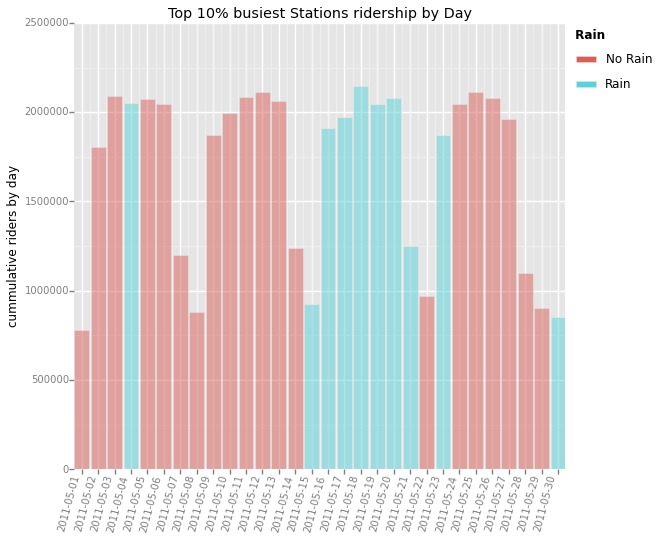

<ggplot: (288631125)>


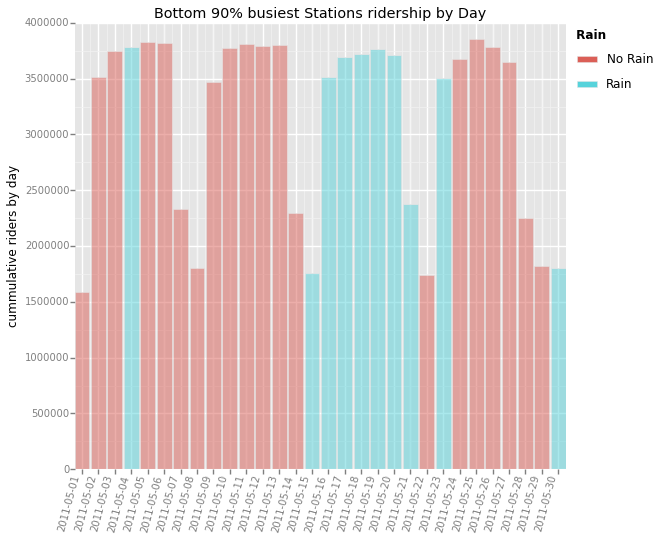

<ggplot: (289589757)>


In [63]:
def label_hack(x):
    '''
    Necessary as a reuslt of the limited functionality of python ggplot port compared to the
    r-version. No scale_x_discrete to adjust the 0,1 labels for rain on the legend. Therefore
    I decided to simply change the numerical representation to a qaulitative one for these graphs.
    '''
    if x == 0:
        return 'no rain'
    else:
        return 'rain'

def high_low_stations(turnstile_weather):
    ''' 
    Input weather turnstile data frame, divide data set into the top 
    10% busiest stations and the other 90%. Return graphs charting the differences
    in ridership numbers when raining between these two groups.
    '''
    df = turnstile_weather
    df_high =  df.groupby(['UNIT']).sum().sort("ENTRIESn_hourly",ascending=False)
    # separate out the top 10% busiest stations
    df_top10 = df_high[0:int(.1*len(df_high))]
    df_bottom90 = df_high[int(.1*len(df_high)):]
    #print list(df_top10.index.values)
    #print list(df_bottom90.index.values)
    # create boolean slicer for the two groups
    df_top_mask = df['UNIT'].isin(list(df_top10.index.values))
    df_bottom_mask = df['UNIT'].isin(list(df_bottom90.index.values))
    
    # Separated dataframes representing the top 10% and the bottom 90%
    df_top = df[df_top_mask]
    df_bottom = df[df_bottom_mask]
    
    # apply label hack to label presence of rain
    df_top['rain']=df_top['rain'].map(lambda x: label_hack(x))
    
    plot1 = ggplot(df_top,aes(x='DATEn', y = 'ENTRIESn_hourly', fill = 'rain')) + \
                geom_histogram(aes(weight = 'ENTRIESn_hourly'), alpha = .5) + \
                theme(axis_text_x=element_text(angle = 75, hjust = 1 )) + \
                ggtitle("Top 10% busiest Stations ridership by Day") + \
                xlab("") + \
                ylab("cummulative riders by day")
    print(plot1)
    # apply label hack to label presence of rain
    df_bottom['rain']=df_bottom['rain'].map(lambda x: label_hack(x))
    
    plot2 = ggplot(df_bottom,aes(x='DATEn', y = 'ENTRIESn_hourly', fill = 'rain')) + \
                geom_histogram(aes(weight = 'ENTRIESn_hourly'), alpha = .5) + \
                theme(axis_text_x=element_text(angle = 75, hjust = 1 )) + \
                ggtitle("Bottom 90% busiest Stations ridership by Day") + \
                xlab("") + \
                ylab("cummulative riders by day")
    print(plot2)           
    return None

if __name__=="__main__":
    turnstile_weather = pd.read_csv("turnstile_data_master_with_weather.csv")
    turnstile_weather = turnstile_weather.iloc[:,1:len(turnstile_weather.columns)]
    warnings.simplefilter('ignore')
    high_low_stations(turnstile_weather)

*Analysis:*   
>These two graphs were created to discover if a difference existed in ridership during rainy days or not based on the traffic of the stations. To further clarify, I split the data into two different sets, one representing the top 10% busiest stations and the other consisting of the remaining 90%. I then charted the total ridership by day and further distinguished the data by whether or not it was raining. It appears that for the busiest stations there is not much difference between rainy days and non-rainy days. For the bottom 90% of stations it does appear as if there might be a slight reduction of ridership during rainy days. 

<a id="Problem Set 5 -- MapReduce"><a>
***

## Problem Set 5 - MapReduce on Subway Data   

*Note*:  
> The following code will write mappers and reducers to the local directory where the file to be map-reduced will also reside. As this ipython notebook does not link to an actual HDF I simulate the map reduce process using GNU linux bash to read the input file line by line and pipe the results to the mapper then a sort function, next to the reducer and finally I write the results to a text file in the local directory. 

In [64]:
%%writefile Subway_data_mapper.py
#!/usr/bin/python
import sys

def mapper():
    """
    The input to this mapper will be the final Subway-MTA dataset, the same as
    in the previous exercise.  You can check out the csv and its structure below:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv

    For each line of input, the mapper output should PRINT (not return) the UNIT as 
    the key, the number of ENTRIESn_hourly as the value, and separate the key and 
    the value by a tab. For example: 'R002\t105105.0'
    """
    for line in sys.stdin:
        #split csv into values for each column
        line_split = line.strip().split(",")
        # Ignore header row
        if line_split[1] == 'UNIT':
            continue
        # print District(tab)Entries hourly
        else:
            print "{0}\t{1}".format(line_split[1],line_split[6])
               
if __name__=="__main__":
    mapper()


Overwriting Subway_data_mapper.py


In [65]:
%%writefile Subway_data_reducer.py
#!/usr/bin/python
import sys
def reducer():
    '''
    Given the output of the mapper for this exercise, the reducer should PRINT 
    (not return) one line per UNIT along with the total number of ENTRIESn_hourly 
    over the course of May (which is the duration of our data), separated by a tab.
    An example output row from the reducer might look like this: 'R001\t500625.0'

    You can assume that the input to the reducer is sorted such that all rows
    corresponding to a particular UNIT are grouped together.
    '''
    # Establish key and value
    Tot_Entries_by_hr = 0
    old_Key = None
    
    for line in sys.stdin:
        # split District and values
        line_split = line.strip().split("\t")
        this_Key,entries_values = line_split
        # If you have a new key the print out the old key and the sum of all its values
        if old_Key and old_Key != this_Key:
            print"{0}\t{1}".format(old_Key,Tot_Entries_by_hr)
            old_Key = this_Key
            Tot_Entries_by_hr = float(entries_values)
        # If this is the first input the establish the first key  and value 
        elif not old_Key:
            old_Key = this_Key
            Tot_Entries_by_hr = float(entries_values)
        # for identical keys add values to running total for the key(District)
        else: 
            Tot_Entries_by_hr += float(entries_values)
    
    print"{0}\t{1}".format(old_Key,Tot_Entries_by_hr)

if __name__=="__main__":
    reducer()

Overwriting Subway_data_reducer.py


In [66]:
%%bash
# this will show the first ten lines of the final result
cat turnstile_data_master_with_weather.csv | python Subway_data_mapper.py | sort -k 1,1 -t $'\t' | python Subway_data_reducer.py > Subway_data_results.txt;head -10 Subway_data_results.txt

R001	749682.0
R002	176535.0
R003	35938.0
R004	93104.0
R005	91031.0
R006	109473.0
R007	62391.0
R008	66629.0
R009	55927.0
R010	854243.0


In [67]:
%%writefile Subway_data_avg_mapper.py
#!/usr/bin/python
import sys
def mapper():
    '''
    For this exercise, compute the average value of the ENTRIESn_hourly column 
    for different weather types. Weather type will be defined based on the 
    combination of the columns fog and rain (which are boolean values).
    For example, one output of our reducer would be the average hourly entries 
    across all hours when it was raining but not foggy.

    Each line of input will be a row from our final Subway-MTA dataset in csv format.
    You can check out the input csv file and its structure below:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    
    Note that this is a comma-separated file.

    This mapper should PRINT (not return) the weather type as the key (use the 
    given helper function to format the weather type correctly) and the number in 
    the ENTRIESn_hourly column as the value. They should be separated by a tab.
    For example: 'fog-norain\t12345'
    
    Since you are printing the output of your program, printing a debug 
    statement will interfere with the operation of the grader. Instead, 
    use the logging module, which we've configured to log to a file printed 
    when you click "Test Run". For example:
    logging.info("My debugging message")
    Note that, unlike print, logging.info will take only a single argument.
    So logging.info("my message") will work, but logging.info("my","message") will not.
    '''

    # Takes in variables indicating whether it is foggy and/or rainy and
    # returns a formatted key that you should output.  The variables passed in
    # can be booleans, ints (0 for false and 1 for true) or floats (0.0 for
    # false and 1.0 for true), but the strings '0.0' and '1.0' will not work,
    # so make sure you convert these values to an appropriate type before
    # calling the function.
    def format_key(fog, rain):
        return '{}fog-{}rain'.format(
            '' if fog else 'no',
            '' if rain else 'no'
        )
    
    for line in sys.stdin:
        # split line input into column elems.
        line_split = line.strip().split(",")
        # Skip the header line of the csv
        if line_split[1] == 'UNIT':
            continue
        else: # check whether or not it was raining or foggy, both, either or, or neither   
            print "{0}\t{1}".format(format_key(int(float(line_split[14])),int(float(line_split[15]))),line_split[6])
        

if __name__=="__main__":
    mapper()


Overwriting Subway_data_avg_mapper.py


In [68]:
# For the purpose of debugging the mapper function
#!cat turnstile_data_master_with_weather.csv | python Subway_data_avg_mapper.py > debug_mapper_results.txt; head -10000 debug_mapper_results.txt

In [69]:
%%writefile Subway_data_avg_reducer.py
#!/usr/bin/python
import sys
def reducer():
    '''
    Given the output of the mapper for this assignment, the reducer should
    print one row per weather type, along with the average value of
    ENTRIESn_hourly for that weather type, separated by a tab. You can assume
    that the input to the reducer will be sorted by weather type, such that all
    entries corresponding to a given weather type will be grouped together.

    In order to compute the average value of ENTRIESn_hourly, you'll need to
    keep track of both the total riders per weather type and the number of
    hours with that weather type. That's why we've initialized the variable 
    riders and num_hours below. Feel free to use a different data structure in 
    your solution, though.

    An example output row might look like this:
    'fog-norain\t1105.32467557'
    '''

    riders = 0      # The number of total riders for this key
    num_hours = 0   # The number of hours with this key
    old_key = None

    for line in sys.stdin:
        # split District and values
        line_split = line.strip().split("\t")
        this_key,entries_values = line_split
        # If you have a new key the print out the old key and the sum of all its values then set new key and values
        if old_key and old_key != this_key:
            print"{0}\t{1}".format(old_key,riders/float(num_hours))
            old_key = this_key
            riders = float(entries_values)
            num_hours = 1
        # If this is the first input the establish the first key  and value 
        elif not old_key:
            old_key = this_key
            riders = float(entries_values)
            num_hours = 1
        # for identical keys add values to running total for the key(District)
        else: 
            riders += float(entries_values)
            num_hours += 1
    
    print"{0}\t{1}".format(old_key,riders/float(num_hours)) 


if __name__=="__main__":
    reducer()


Overwriting Subway_data_avg_reducer.py


In [70]:
%%bash
# Displays final results
cat turnstile_data_master_with_weather.csv | python Subway_data_avg_mapper.py | sort | python Subway_data_avg_reducer.py > Subway_avg_results.txt; cat Subway_avg_results.txt


fog-norain	1315.57980681
fog-rain	1115.13151799
nofog-norain	1078.54679697
nofog-rain	1098.95330076


In [71]:
%%writefile Subway_data_max_mapper.py
#!/usr/bin/python
import sys
def mapper():
    """
    In this exercise, for each turnstile unit, you will determine the date and time 
    (in the span of this data set) at which the most people entered through the unit.
    
    The input to the mapper will be the final Subway-MTA dataset, the same as
    in the previous exercise. You can check out the csv and its structure below:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv

    For each line, the mapper should return the UNIT, ENTRIESn_hourly, DATEn, and 
    TIMEn columns, separated by tabs. For example:
    'R001\t100000.0\t2011-05-01\t01:00:00'
    """

    for line in sys.stdin:
        # split input lines by ','
        line_split = line.strip().split(",")
        # ignore header line from csv file
        if line_split[1] == 'UNIT':
            continue
        else:
            print"{0}\t{1}\t{2}\t{3}".format(line_split[1],line_split[6],line_split[2],line_split[3])
            
if __name__=="__main__":
    mapper()


Overwriting Subway_data_max_mapper.py


In [72]:
# For the purpose of debugging the mapper function
#!cat turnstile_data_master_with_weather.csv | python Subway_data_max_mapper.py > debug_max_mapper_results.txt; head -15 debug_max_mapper_results.txt

In [73]:
%%writefile Subway_data_max_reducer.py
#!/usr/bin/python
import sys
def reducer():
    '''
    Write a reducer that will compute the busiest date and time (that is, the 
    date and time with the most entries) for each turnstile unit. Ties should 
    be broken in favor of datetimes that are later on in the month of May. You 
    may assume that the contents of the reducer will be sorted so that all entries 
    corresponding to a given UNIT will be grouped together.
    
    The reducer should print its output with the UNIT name, the datetime (which 
    is the DATEn followed by the TIMEn column, separated by a single space), and 
    the number of entries at this datetime, separated by tabs.

    For example, the output of the reducer should look like this:
    R001    2011-05-11 17:00:00	   31213.0
    R002	2011-05-12 21:00:00	   4295.0
    R003	2011-05-05 12:00:00	   995.0
    R004	2011-05-12 12:00:00	   2318.0
    R005	2011-05-10 12:00:00	   2705.0
    R006	2011-05-25 12:00:00	   2784.0
    R007	2011-05-10 12:00:00	   1763.0
    R008	2011-05-12 12:00:00	   1724.0
    R009	2011-05-05 12:00:00	   1230.0
    R010	2011-05-09 18:00:00	   30916.0
    ...
    ...
    
    '''

    max_entries = 0
    old_key = None
    datetime = ''

    for line in sys.stdin:
        # split District and values
        line_split = line.strip().split("\t")
        this_key,entries_values,date,time = line_split
        # If you have a new key the print out the old key(unit) and the value, date and time of the max number of riders 
        if old_key and old_key != this_key:    
            print"{0}\t{1}\t{2}".format(old_key,datetime,max_entries)
            old_key = this_key
            max_entries = float(entries_values)
            datetime = ' '.join([date,time])
        # If this is the first input establish the first key and value(s) 
        elif not old_key:
            old_key = this_key
            max_entries = float(entries_values)
            datetime = ' '.join([date,time])
        # for identical keys add entries value if it is greater then the last entries value for the key
        else: 
            if float(entries_values) >= max_entries:
                max_entries = float(entries_values)
                datetime = ' '.join([date,time])
            else:
                continue
    
    print"{0}\t{1}\t{2}".format(old_key,datetime,max_entries)


if __name__=="__main__":
    reducer()


Overwriting Subway_data_max_reducer.py


In [74]:
%%bash
# Displays first ten lines of final result
cat turnstile_data_master_with_weather.csv | python Subway_data_max_mapper.py | sort | python Subway_data_max_reducer.py > Subway_max_results.txt; head -10 Subway_max_results.txt

R001	2011-05-11 17:00:00	31213.0
R002	2011-05-12 21:00:00	4295.0
R003	2011-05-05 12:00:00	995.0
R004	2011-05-12 12:00:00	2318.0
R005	2011-05-10 12:00:00	2705.0
R006	2011-05-25 12:00:00	2784.0
R007	2011-05-10 12:00:00	1763.0
R008	2011-05-12 12:00:00	1724.0
R009	2011-05-05 12:00:00	1230.0
R010	2011-05-09 18:00:00	30916.0
